In [36]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

from IPython.display import IFrame
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.16.2'

In [39]:
# gdf = ox.geocode_to_gdf('Georgia, US')

london = 'London, Ontario, CA'

In [6]:
# state = ox.geocode('Georgia, US') 

georgia = ox.geocode_to_gdf('Georgia, US')
# ox.project_gdf(mx_gt_tx)
# ox.plot_shape(ox.project_gdf(state))

(57332.19547543672, 545667.4148092695, 3332571.5950562563, 3907154.7193306126)

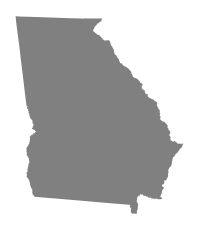

In [9]:
georgiaP = ox.project_gdf(georgia)
fig = georgiaP.plot(fc='gray')
fig.axis('off')

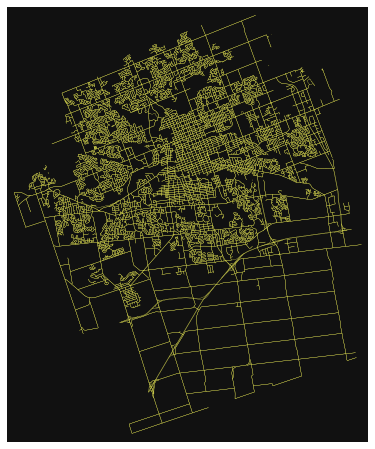

In [10]:
G = ox.graph_from_place('London, Ontario, CA', network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#FFFF5C', edge_linewidth=0.25)

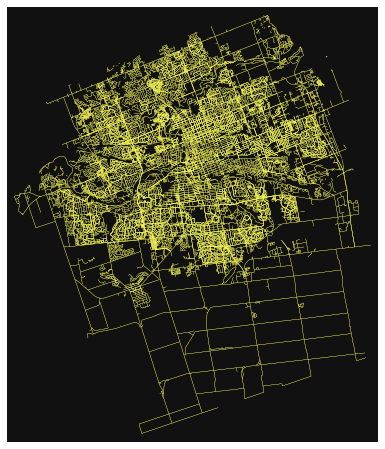

In [11]:
G = ox.graph_from_place('London, Ontario, CA', network_type='walk', retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#FFFF5C', edge_linewidth=0.25)

In [12]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [13]:
G

### Find Path between two points

In [27]:
start = (-81.25436, 42.98311) ## Eldon House
end = (-81.25049, 42.98571) ## St. Paul's Cathedral

start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)

In [28]:
route = nx.shortest_path(G, start_node, end_node, weight='length')

In [29]:
long = [] 
lat = []  
for i in route:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [34]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 42.98329512132264, mapbox_center_lon=-81.2453838175369)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [37]:
plot_path(lat, long, start, end)

# 42.98329512132264, -81.2453838175369

## Testing with Folium

In [61]:
G = ox.graph_from_place(london, network_type='drive')
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)

In [62]:
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [58]:
start = (-81.25436, 42.98311) ## Eldon House
end = (-81.29094, 43.01068) ## Elsie Perrin Williams Estate

origin_node = ox.get_nearest_node(G, start)
destination_node = ox.get_nearest_node(G, end)

In [65]:
# G

In [59]:
origin_node

347956693

In [60]:
destination_node

347956693

In [55]:
# use networkx to calculate the shortest path between two nodes
# origin_node = list(G.nodes())[0]
# destination_node = list(G.nodes())[-1]
route = nx.shortest_path(G, origin_node, destination_node)

In [56]:
route

[347956693]

In [49]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

ValueError: Graph has no edges, cannot convert to a GeoDataFrame.

In [45]:
filepath = 'data/route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [46]:
origin_node

21383914

In [47]:
destination_node

8090900466

In [ ]:
G = ox.graph_from_place(london, network_type='drive')

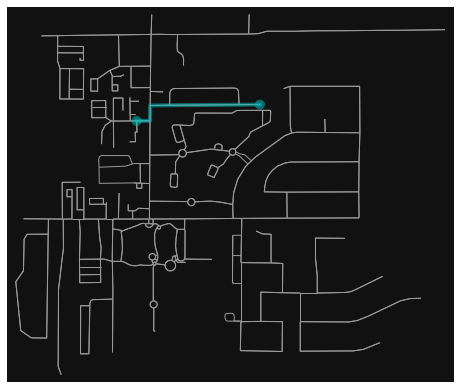

In [66]:
location_point = (33.299896, -111.831638)
G2 = ox.graph_from_point(location_point, dist=400, truncate_by_edge=True)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.get_nearest_node(G2, origin)
destination_node = ox.get_nearest_node(G2, destination)
route = ox.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_color='c', node_size=0)